In [2]:
import numpy
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas

In [3]:
# taking data from files
with open('../data/test.pkl', 'rb') as file1:
    data = pickle.load(file1)
with open('../data/train.pkl', 'rb') as file2:
    data2 = pickle.load(file2)

In [3]:
# shuffling data
sz = data2.shape[0]
numpy.random.shuffle(data2)
sz = data.shape[0]
numpy.random.shuffle(data)

In [4]:
# splitting data into coordinates
x = data2[:,:-1]
y = data2[:,1]
test_x = data[:,:-1]
test_y = data[:,1]

In [5]:
# splitting training set into 10 parts
train_x = numpy.array((numpy.array_split(x, 10)))
train_y = numpy.array((numpy.array_split(y, 10)))

In [6]:
# initialising tables
v_table = numpy.zeros((10,10))
b_table = numpy.zeros((10,10))

In [7]:
# initialising arrays
bias = numpy.zeros((20))
bias2_avg = numpy.zeros((20))
var_avg = numpy.zeros((20))
err_avg = numpy.zeros((20))
tot_avg = numpy.zeros((20))
irr_avg = numpy.zeros((20))
xarr = numpy.zeros((20))

In [8]:
# calc for each degree
for degree in range (1,21):
    res1 = numpy.zeros((10,80))
    res2 = numpy.zeros((10,80))
    #for training set
    for i in range (10):
        poly = PolynomialFeatures(degree=degree, include_bias=False)

        #Transform the polynomial features1 as required
        X = poly.fit_transform(train_x[i])
        X_TEST = poly.fit_transform(test_x)
        reg = LinearRegression()

        #Train the model for the chosen training set
        reg.fit(X, train_y[i])
        y_predict = reg.predict(X_TEST)

        res1[i] = y_predict
        res2[i] = (test_y - y_predict)**2

    #calculate bias
    point_avg=numpy.mean(res1,axis=0)
    bias2_avg[degree-1]=numpy.mean((point_avg-test_y)**2)
    bias[degree-1]=numpy.abs(numpy.mean((point_avg-test_y)))
    new_avg=numpy.mean(res2, axis=0)
    #calculate variance
    point_var = numpy.var(res1,axis=0)
    var_avg[degree-1]=numpy.mean(point_var)
    #irreducible error calc
    err_avg[degree-1]=numpy.mean(new_avg) - (bias2_avg[degree-1] + var_avg[degree-1])
    # total error calc
    tot_avg[degree-1]=numpy.mean(new_avg)


In [9]:
fin_avg = numpy.mean(err_avg)
#for starting graph at x=1
use = numpy.zeros((20))
for degree in range (1,21):
    use[degree-1] = fin_avg
    xarr[degree-1] = degree

In [10]:
# table 1
bias_table=pandas.DataFrame({'Degree':numpy.array(range(1,21)),'Bias':bias,'Variance': var_avg, 'Total Error': tot_avg})
print(bias_table.to_string(index=False))
print('')

 Degree       Bias      Variance  Total Error
      1 231.357297  30861.144128 1.033871e+06
      2 227.326495  54270.382667 1.010896e+06
      3  15.970239  88571.607355 9.860308e+04
      4  10.159046 109998.124526 1.190728e+05
      5   6.952178 139727.351411 1.481205e+05
      6   8.811795 151462.424236 1.593715e+05
      7   2.629138 176036.484613 1.842606e+05
      8   7.689096 193223.168482 2.016299e+05
      9   6.241115 242173.902770 2.513633e+05
     10  11.898679 212535.367371 2.226044e+05
     11   9.204463 256419.447705 2.670020e+05
     12   5.094152 232219.386098 2.528695e+05
     13  12.316387 266680.328945 2.792715e+05
     14  21.939739 242568.968659 2.696649e+05
     15  30.129640 246238.836329 2.959643e+05
     16  31.325810 250506.007469 3.081951e+05
     17  43.970706 249467.889831 3.532988e+05
     18  46.828925 252249.732550 3.652708e+05
     19  61.438390 253243.693744 4.397213e+05
     20  65.461974 254879.277230 4.522052e+05



In [11]:
# table 2
error_table=pandas.DataFrame({'Degree':numpy.array(range(1,21)), 'Irreducible Error':err_avg[:]})
print(error_table.to_string(index=False))

 Degree  Irreducible Error
      1       1.164153e-10
      2       0.000000e+00
      3       0.000000e+00
      4       1.455192e-11
      5       0.000000e+00
      6       0.000000e+00
      7       0.000000e+00
      8       0.000000e+00
      9       2.910383e-11
     10      -5.820766e-11
     11       0.000000e+00
     12       2.910383e-11
     13       0.000000e+00
     14       0.000000e+00
     15      -5.820766e-11
     16       0.000000e+00
     17       0.000000e+00
     18      -5.820766e-11
     19       1.164153e-10
     20       5.820766e-11


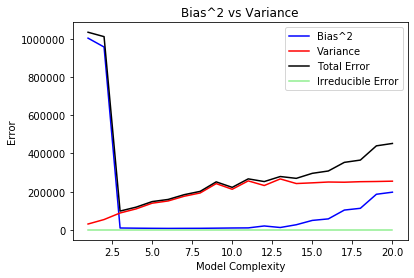

In [12]:
plt.plot(xarr[:], bias2_avg[:], label='Bias^2', color = 'blue')
plt.plot(xarr[:], var_avg[:],label='Variance', color = 'red')
plt.plot(xarr[:], tot_avg[:],label='Total Error', color = 'black')
plt.plot(xarr[:], err_avg[:],label='Irreducible Error', color = 'lightgreen')
plt.xlabel('Model Complexity', fontsize='medium')
plt.ylabel('Error', fontsize='medium')
plt.title("Bias^2 vs Variance")
plt.legend()
plt.show()

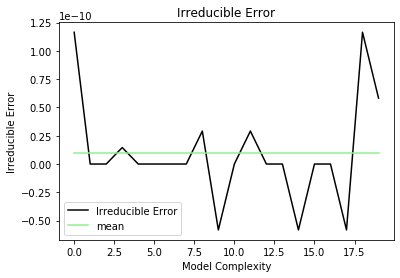

In [13]:
plt.xlabel('Model Complexity', fontsize='medium')
plt.ylabel('Irreducible Error', fontsize='medium')
plt.title("Irreducible Error")
plt.plot(err_avg[:],label='Irreducible Error', color = 'black')
plt.plot(use[:],label='mean', color='lightgreen')
plt.legend()
plt.show()